Epoch [1000/10000], D Loss: 1.1700, G Loss: 0.8641
Epoch [2000/10000], D Loss: 1.0345, G Loss: 0.9173
Epoch [3000/10000], D Loss: 0.8514, G Loss: 1.1544
Epoch [4000/10000], D Loss: 0.7786, G Loss: 1.1622
Epoch [5000/10000], D Loss: 0.7440, G Loss: 1.2776
Epoch [6000/10000], D Loss: 0.5473, G Loss: 1.6228
Epoch [7000/10000], D Loss: 0.5139, G Loss: 1.9330
Epoch [8000/10000], D Loss: 0.4093, G Loss: 1.7541
Epoch [9000/10000], D Loss: 0.4461, G Loss: 1.8869
Epoch [10000/10000], D Loss: 0.3708, G Loss: 2.0024


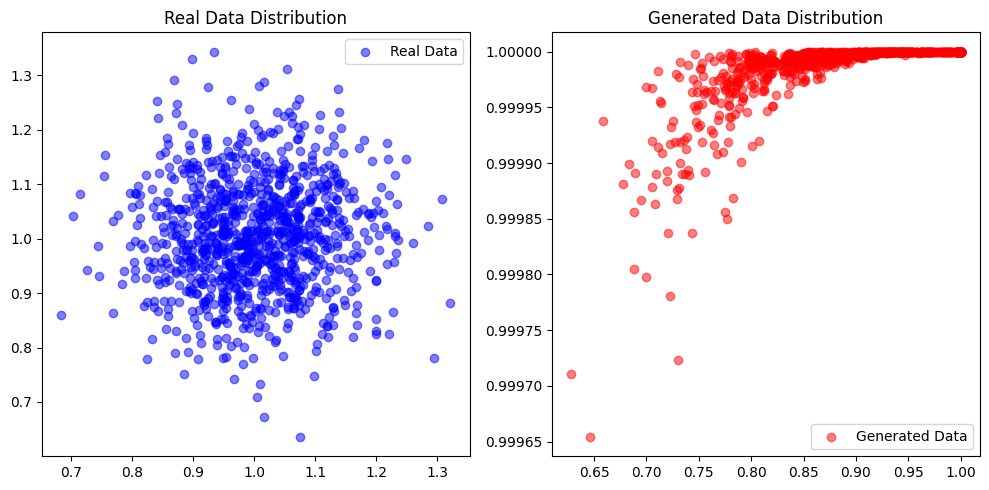

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the Generator
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Set hyperparameters
latent_dim = 10
output_dim = 2
batch_size = 64
num_epochs = 10000

# Initialize Generator and Discriminator
generator = Generator(latent_dim, output_dim)
discriminator = Discriminator(output_dim)

# Define loss function and optimizers
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)

# Training loop
for epoch in range(num_epochs):
    # Train Discriminator
    d_optimizer.zero_grad()
    
    # Generate fake data
    z = torch.randn(batch_size, latent_dim)
    fake_data = generator(z)
    
    # Generate real data (a simple 2D distribution)
    real_data = torch.randn(batch_size, output_dim) * 0.1 + torch.tensor([1.0, 1.0])
    
    # Train on real data
    real_labels = torch.ones(batch_size, 1)
    real_outputs = discriminator(real_data)
    d_loss_real = criterion(real_outputs, real_labels)
    
    # Train on fake data
    fake_labels = torch.zeros(batch_size, 1)
    fake_outputs = discriminator(fake_data.detach())
    d_loss_fake = criterion(fake_outputs, fake_labels)
    
    d_loss = d_loss_real + d_loss_fake
    d_loss.backward()
    d_optimizer.step()
    
    # Train Generator
    g_optimizer.zero_grad()
    fake_outputs = discriminator(fake_data)
    g_loss = criterion(fake_outputs, real_labels)
    g_loss.backward()
    g_optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

# Visualize results
with torch.no_grad():
    z = torch.randn(1000, latent_dim)
    generated_data = generator(z).numpy()
    real_data = torch.randn(1000, output_dim) * 0.1 + torch.tensor([1.0, 1.0])
    real_data = real_data.numpy()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(real_data[:, 0], real_data[:, 1], c='blue', alpha=0.5, label='Real Data')
plt.title('Real Data Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(generated_data[:, 0], generated_data[:, 1], c='red', alpha=0.5, label='Generated Data')
plt.title('Generated Data Distribution')
plt.legend()

plt.tight_layout()
plt.show()

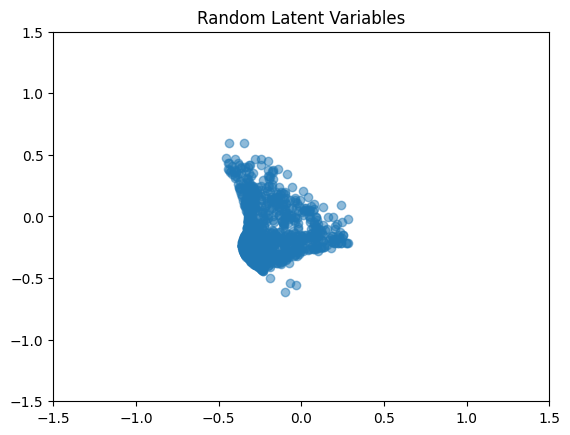

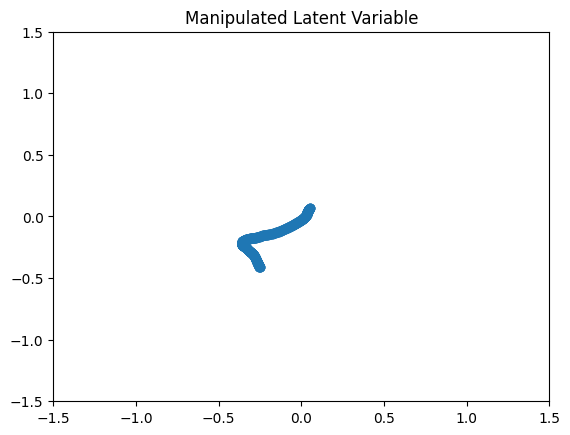

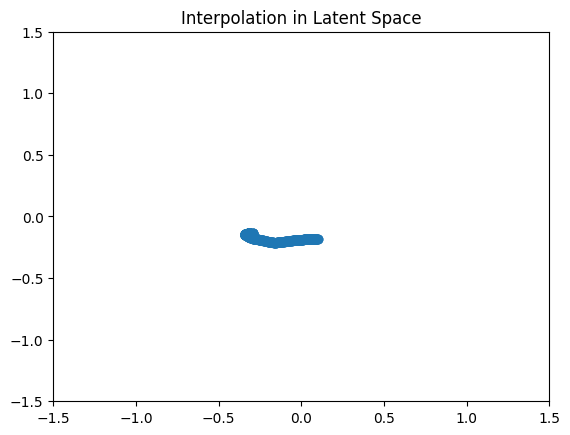

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Assume we have a pre-trained generator
class SimpleGenerator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(SimpleGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Initialize the generator
latent_dim = 2
output_dim = 2
generator = SimpleGenerator(latent_dim, output_dim)

# Function to visualize generated points
def plot_generated_points(z, title):
    with torch.no_grad():
        generated = generator(z).numpy()
    plt.scatter(generated[:, 0], generated[:, 1], alpha=0.5)
    plt.title(title)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.show()

# Generate points from random latent variables
z_random = torch.randn(1000, latent_dim)
plot_generated_points(z_random, "Random Latent Variables")

# Manipulate one dimension of the latent space
z_manipulated = torch.zeros(1000, latent_dim)
z_manipulated[:, 0] = torch.linspace(-2, 2, 1000)
plot_generated_points(z_manipulated, "Manipulated Latent Variable")

# Interpolate between two points in latent space
z_start = torch.tensor([[-1.0, -1.0]])
z_end = torch.tensor([[1.0, 1.0]])
alphas = torch.linspace(0, 1, 1000).unsqueeze(1)
z_interpolated = z_start * (1 - alphas) + z_end * alphas
plot_generated_points(z_interpolated, "Interpolation in Latent Space")

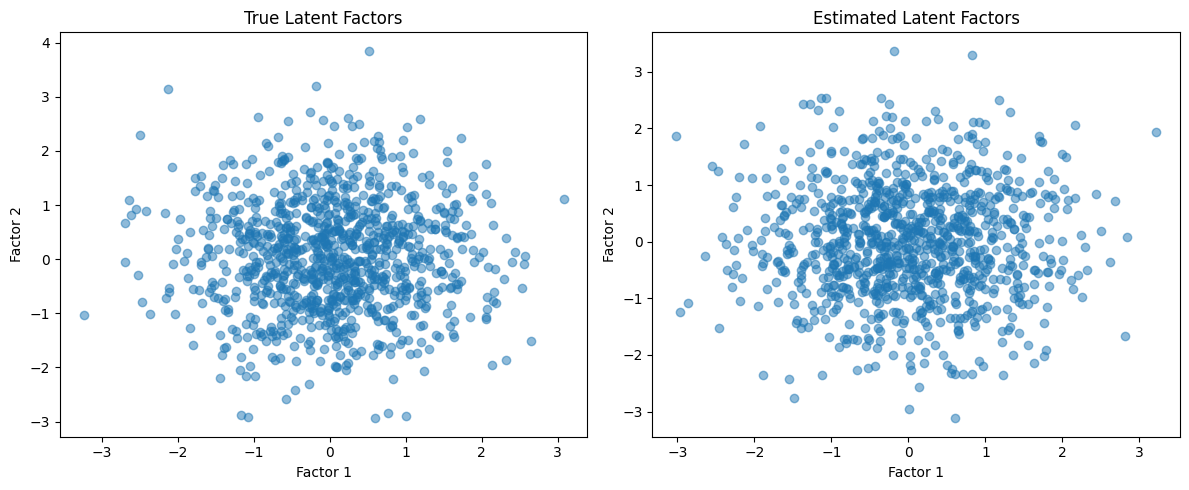

Estimated Factor Loadings:
[[ 0.66319755 -0.43325622]
 [ 0.68393543 -0.2917165 ]
 [ 0.73326321  0.39688369]
 [ 0.72046743  0.26359194]
 [ 0.69485158 -0.01786197]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis

# Generate synthetic data
np.random.seed(42)
n_samples = 1000
n_features = 5
n_factors = 2

# True latent factors
true_factors = np.random.randn(n_samples, n_factors)

# Factor loadings
loadings = np.array([[0.8, 0.2],
                     [0.7, 0.3],
                     [0.2, 0.8],
                     [0.3, 0.7],
                     [0.5, 0.5]])

# Generate observed data
observed_data = np.dot(true_factors, loadings.T) + np.random.randn(n_samples, n_features) * 0.1

# Perform Factor Analysis
fa = FactorAnalysis(n_components=n_factors, random_state=42)
estimated_factors = fa.fit_transform(observed_data)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(true_factors[:, 0], true_factors[:, 1], alpha=0.5)
plt.title("True Latent Factors")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")

plt.subplot(122)
plt.scatter(estimated_factors[:, 0], estimated_factors[:, 1], alpha=0.5)
plt.title("Estimated Latent Factors")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")

plt.tight_layout()
plt.show()

# Print factor loadings
print("Estimated Factor Loadings:")
print(fa.components_.T)

c:\Users\91824\Documents\Codes\deep-learning\udlbook\Notebooks\.venv\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


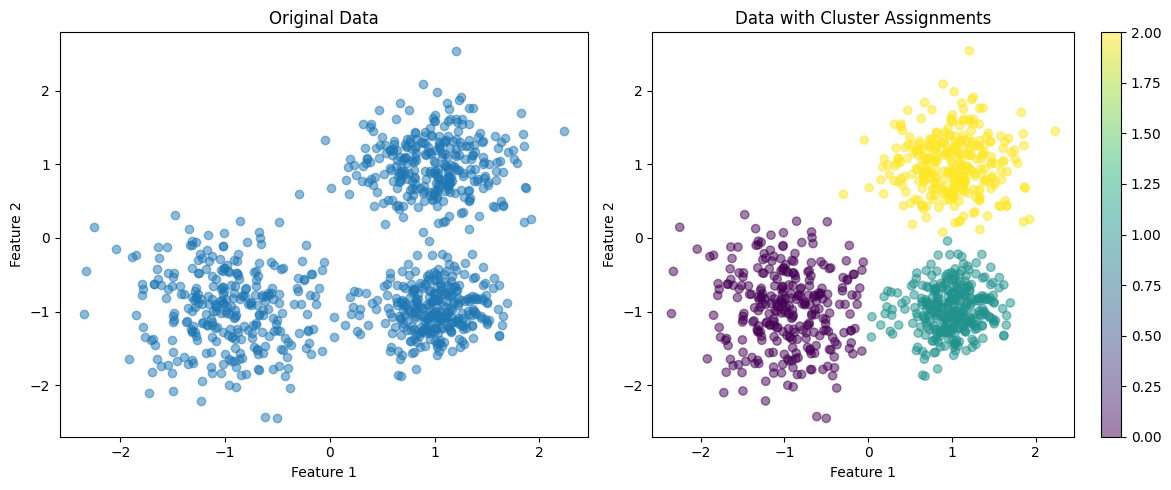

Cluster centers:
[[-0.97727496 -0.95956431]
 [ 0.98626009 -0.97083493]
 [ 0.99568628  0.99349831]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate synthetic data
np.random.seed(42)
n_samples = 300

# Create three clusters
cluster1 = np.random.randn(n_samples, 2) * 0.4 + np.array([1, 1])
cluster2 = np.random.randn(n_samples, 2) * 0.5 + np.array([-1, -1])
cluster3 = np.random.randn(n_samples, 2) * 0.3 + np.array([1, -1])

# Combine all data
X = np.vstack((cluster1, cluster2, cluster3))

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_assignments = kmeans.fit_predict(X)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(122)
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.title("Data with Cluster Assignments")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

print("Cluster centers:")
print(kmeans.cluster_centers_)